# Introdução aos métodos discretos

Nome: Yago Pereira dos Anjos Santos

# Lista 11
### 1) Realizar a interpolação linear por partes para a função $f(x) = 2x\sin(2\pi x) + 3$.

In [215]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin, pi

(a) Definir a função a ser aproximada.

In [216]:
def f(x):
    return np.array([2*u*sin(2*pi*u) + 3 for u in x])

(b) Definir as funções base chapéu:
$\varphi_i= \begin{cases}\left(x-x_{i-1}\right) / h_i, & \text { se } x \in I_i \\ \left(x_{i+1}-x\right) / h_{i+1}, & \text { se } x \in I_{i+1} \\ 0, & \text { caso contrário }\end{cases}$

Os parâmetros são o índice da função a ser avaliada, as coordenadas x dos nós e o ponto z onde a função será avaliada.

In [217]:
def phi(i, x, z):
    if i == 0:
        if 0 <= z <= x[1]:
            return (x[1] - z)/(x[1] - x[0])
        return 0
    elif i == len(x) - 1:
        if x[i-1] <= z <= x[i]:
            return (z - x[i-1])/(x[i] - x[i-1])
        return 0
    else:
        if x[i-1] <= z <= x[i]:
            return (z - x[i-1])/(x[i] - x[i-1])
        elif x[i] <= z <= x[i+1]:
            return (x[i+1] - z)/(x[i+1] - x[i])
        else:
            return 0

(c) Definir o polinômio interpolador, dadas as coordenadas x e y dos nós e o ponto z a ser avaliado pelo polinômio.
	$$
	P(x)=\sum_{i=1}^n f\left(x_i\right) \varphi_i(x)
	$$

In [218]:
def poly_eval(x,y,z):
    p = 0
    for i in range(len(x)):
        p += y[i]*phi(i, x, z)
    return p

(d) Plotar o gráfico do polinômio considerando 6, 10, 15 e 20 nós. Plotar também os nós e a função que está sendo aproximada, conforme exemplo abaixo.

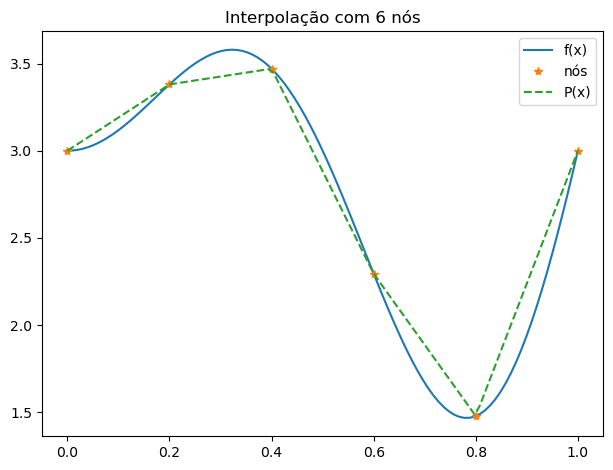

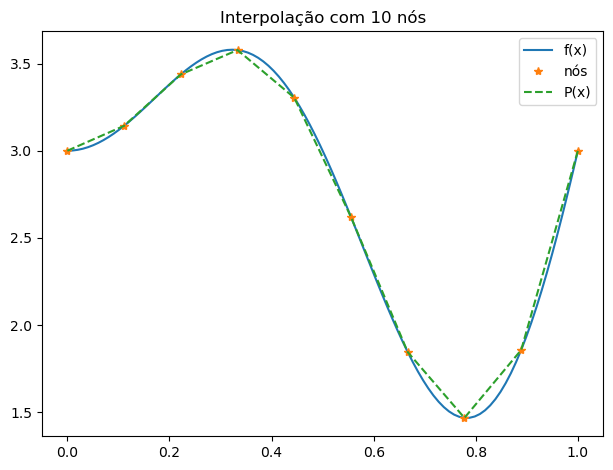

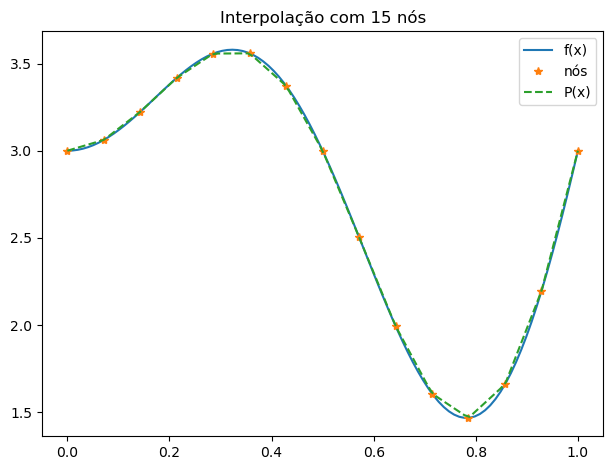

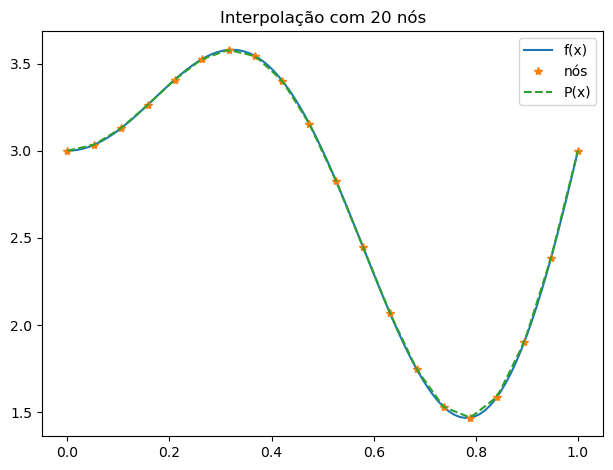

In [219]:
nos = [6, 10, 15, 20]

for no in nos:
    # nós
    x = np.linspace(0, 1, no)
    # função avaliada nos nós
    y = f(x)

    # nós a avaliar a aproximação
    xx = np.linspace(0, 1, 100)
    # avalia interpolação
    yy = []
    for xp in xx:
        yy.append(poly_eval(x, y, xp))

    # plota gráficos
    plt.figure(figsize=(12, 9))
    plt.subplot(2, 2, 1)
    plt.plot(xx, f(xx), '-', label='f(x)')
    plt.plot(x,y,'*', label='nós')
    plt.plot(xx, yy, '--', label='P(x)')
    plt.title(f'Interpolação com {no} nós')
    plt.legend()
    plt.tight_layout()
    plt.show()